In [1]:
import pandas as pd

In [5]:
footfall_df = pd.read_csv("data/footfall_data.csv")
sales_df = pd.read_csv("data/cafe_sales_data.csv")
external_df = pd.read_csv("data/external_data.csv")

sales_df.head()

,date,cafe_name,station_nearby,sales_amount,customers
0,2025-06-01,Brew Society,Oxford Circus,1539.08,118
1,2025-06-01,Bean & Gone,Liverpool Street,1047.42,95
2,2025-06-02,Brew Society,Oxford Circus,1042.46,92
3,2025-06-02,Bean & Gone,Liverpool Street,1225.00,97
4,2025-06-03,Brew Society,Oxford Circus,1592.93,120


In [6]:
external_df.head()

,date,station,temperature_c,rain_mm,event
0,2025-06-01,Oxford Circus,19.4,0.0,Strike
1,2025-06-01,Liverpool Street,18.4,0.0,NaN
2,2025-06-01,South Kensington,16.1,0.0,Strike
3,2025-06-02,Oxford Circus,16.5,1.3,NaN
4,2025-06-02,Liverpool Street,20.7,1.8,NaN


In [7]:
footfall_df.head()

,date,station,entries,exits
0,2025-06-01,Oxford Circus,13069,12924
1,2025-06-01,Liverpool Street,9486,9760
2,2025-06-01,South Kensington,14623,14763
3,2025-06-02,Oxford Circus,7566,7156
4,2025-06-02,Liverpool Street,7420,7148


In [8]:
# Total footfall per station
footfall_df.groupby('station')['entries'].sum().sort_values(ascending=False)


station
South Kensington    360565
Oxford Circus       345393
Liverpool Street    336351
Name: entries, dtype: int64

C:\Users\User1\AppData\Local\Temp\ipykernel_23156\422898342.py:28: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User1\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128694 (\N{PEDESTRIAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


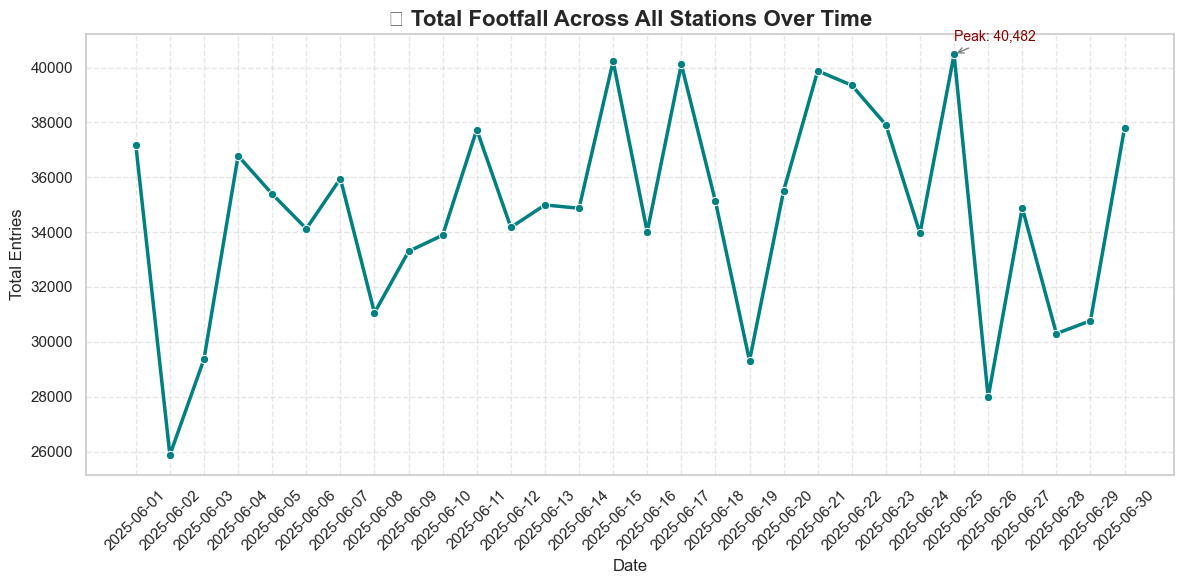

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style
sns.set(style="whitegrid")

# Prepare data
daily_footfall = footfall_df.groupby('date')['entries'].sum().reset_index()

# Create figure
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_footfall, x='date', y='entries', color='teal', linewidth=2.5, marker='o')

# Highlight highest point
max_point = daily_footfall.loc[daily_footfall['entries'].idxmax()]
plt.annotate(f"Peak: {max_point['entries']:,}", 
             xy=(max_point['date'], max_point['entries']), 
             xytext=(max_point['date'], max_point['entries'] + 500),
             arrowprops=dict(arrowstyle="->", color='gray'),
             fontsize=10, color='darkred')

# Labels & aesthetics
plt.title("🚶 Total Footfall Across All Stations Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date")
plt.ylabel("Total Entries")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [16]:
# Sales overview
sales_df.groupby('cafe_name')['sales_amount'].mean().sort_values(ascending=False)


cafe_name
Brew Society    1270.061333
Bean & Gone     1133.716000
Name: sales_amount, dtype: float64

In [15]:
print(sales_df.columns)

Index(['date', 'cafe_name', 'station_nearby', 'sales_amount', 'customers'], dtype='object')


In [12]:
#This keeps things reusable for Streamlit and Jupyter.

def load_data():
    footfall_df = pd.read_csv("data/footfall_data.csv")
    sales_df = pd.read_csv("data/cafe_sales_data.csv")
    external_df = pd.read_csv("data/external_data.csv")
    return footfall_df, sales_df, external_df

In [18]:
merged_df = footfall_df.merge(sales_df, on="date").merge(external_df, on="date")


In [19]:
merged_df.head()

,date,station_x,entries,exits,cafe_name,station_nearby,sales_amount,customers,station_y,temperature_c,rain_mm,event
0,2025-06-01,Oxford Circus,13069,12924,Brew Society,Oxford Circus,1539.08,118,Oxford Circus,19.4,0.0,Strike
1,2025-06-01,Oxford Circus,13069,12924,Brew Society,Oxford Circus,1539.08,118,Liverpool Street,18.4,0.0,NaN
2,2025-06-01,Oxford Circus,13069,12924,Brew Society,Oxford Circus,1539.08,118,South Kensington,16.1,0.0,Strike
3,2025-06-01,Oxford Circus,13069,12924,Bean & Gone,Liverpool Street,1047.42,95,Oxford Circus,19.4,0.0,Strike
4,2025-06-01,Oxford Circus,13069,12924,Bean & Gone,Liverpool Street,1047.42,95,Liverpool Street,18.4,0.0,NaN


In [21]:
corr = merged_df.corr(numeric_only=True)
print(corr)

                entries     exits  sales_amount  customers  temperature_c  \
entries        1.000000  0.992334      0.019295   0.049425       0.025050   
exits          0.992334  1.000000      0.024948   0.055700       0.026621   
sales_amount   0.019295  0.024948      1.000000   0.833677      -0.014937   
customers      0.049425  0.055700      0.833677   1.000000      -0.019134   
temperature_c  0.025050  0.026621     -0.014937  -0.019134       1.000000   
rain_mm       -0.096729 -0.098451      0.031214   0.019116      -0.087624   

                rain_mm  
entries       -0.096729  
exits         -0.098451  
sales_amount   0.031214  
customers      0.019116  
temperature_c -0.087624  
rain_mm        1.000000  


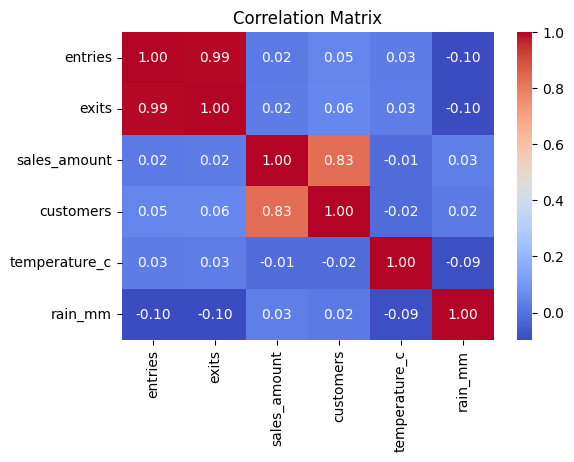

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


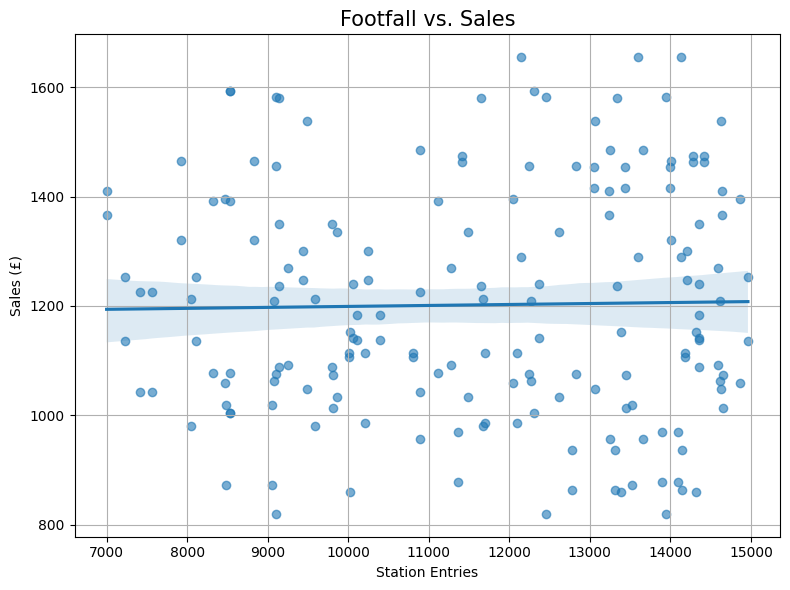

In [25]:
merged_df = footfall_df.merge(sales_df, on="date")

plt.figure(figsize=(8, 6))
sns.regplot(x="entries", y="sales_amount", data=merged_df, scatter_kws={"alpha": 0.6})
plt.title("Footfall vs. Sales", fontsize=15)
plt.xlabel("Station Entries")
plt.ylabel("Sales (£)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\User1\AppData\Local\Temp\ipykernel_23156\1423094738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_df.groupby("cafe_name")["sales_amount"].sum().reset_index(),


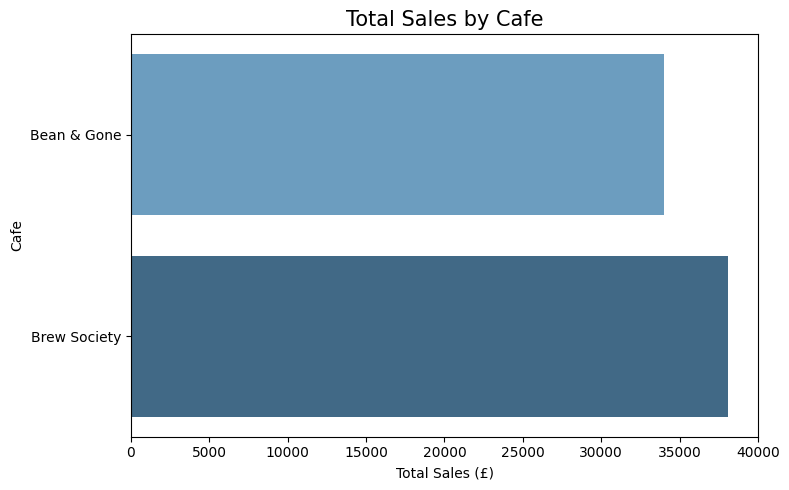

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_df.groupby("cafe_name")["sales_amount"].sum().reset_index(),
            x="sales_amount", y="cafe_name", palette="Blues_d")
plt.title("Total Sales by Cafe", fontsize=15)
plt.xlabel("Total Sales (£)")
plt.ylabel("Cafe")
plt.tight_layout()
plt.show()


C:\Users\User1\AppData\Local\Temp\ipykernel_23156\461454193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sales_df, x="cafe_name", y="sales_amount", palette="pastel", inner="quart")


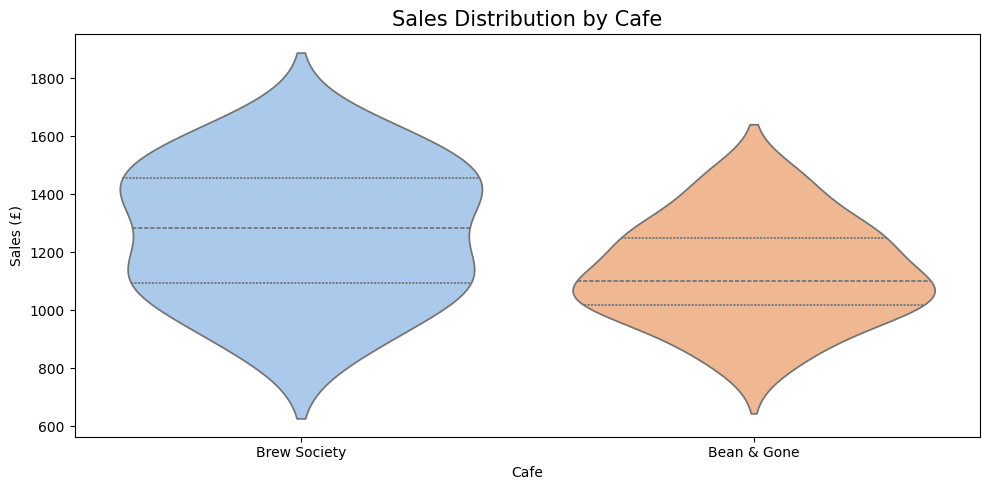

In [27]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=sales_df, x="cafe_name", y="sales_amount", palette="pastel", inner="quart")
plt.title("Sales Distribution by Cafe", fontsize=15)
plt.xlabel("Cafe")
plt.ylabel("Sales (£)")
plt.tight_layout()
plt.show()